In [1]:
#import the libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset

df = pd.read_csv("heart.csv")
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#check the shape of the data

df.shape

(303, 14)

In [4]:
#get the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#check for the null values in data

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#checking the basic statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


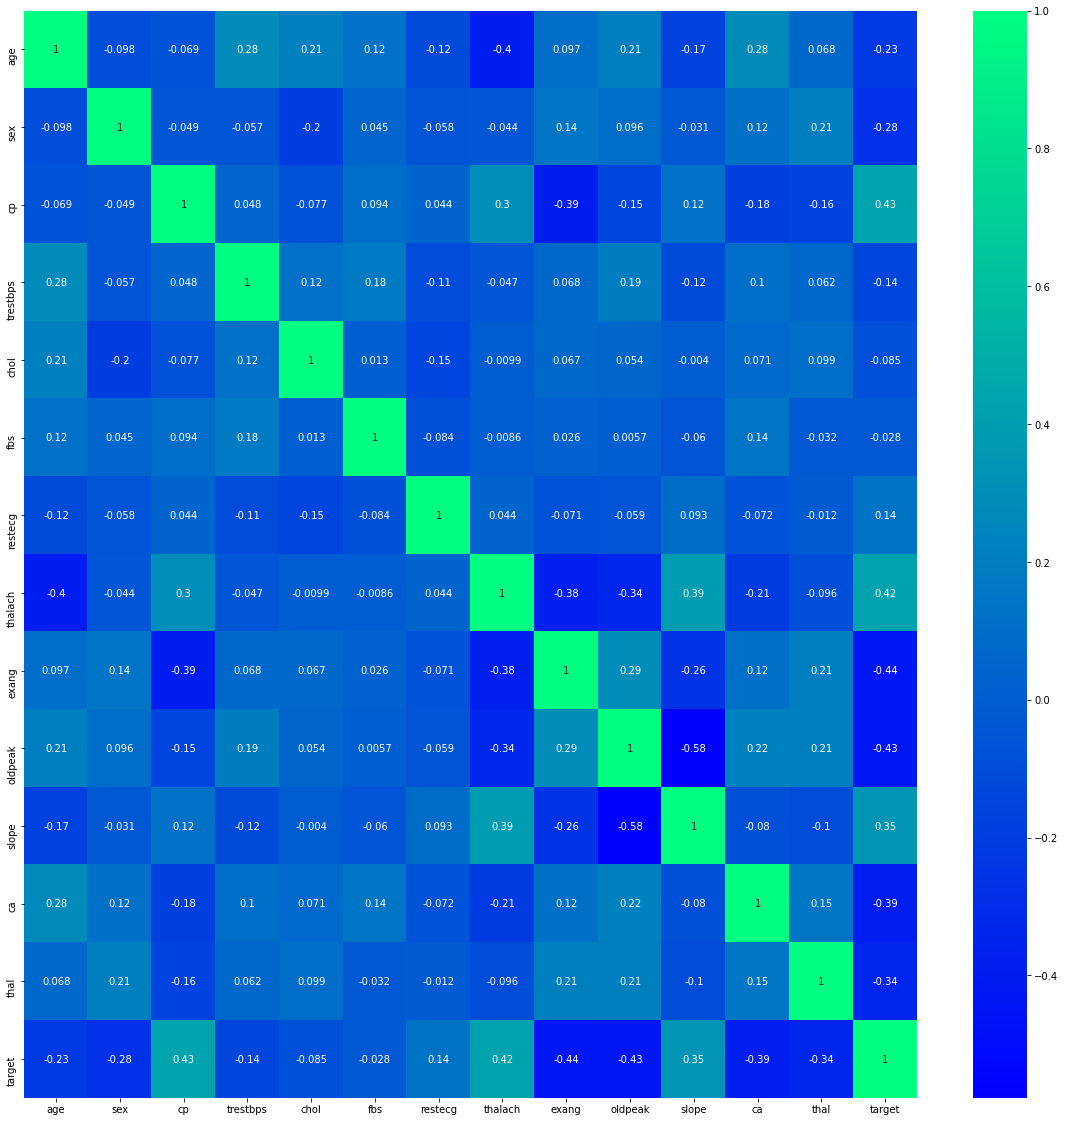

In [7]:
#check for the correlated features in data

corr = df.corr()
fig = plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True, cmap="winter")
plt.show()

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

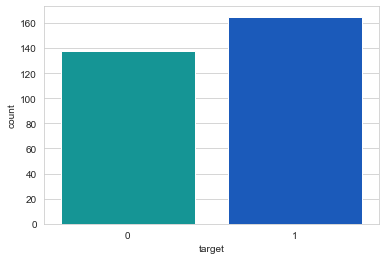

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='winter_r')
plt.show()

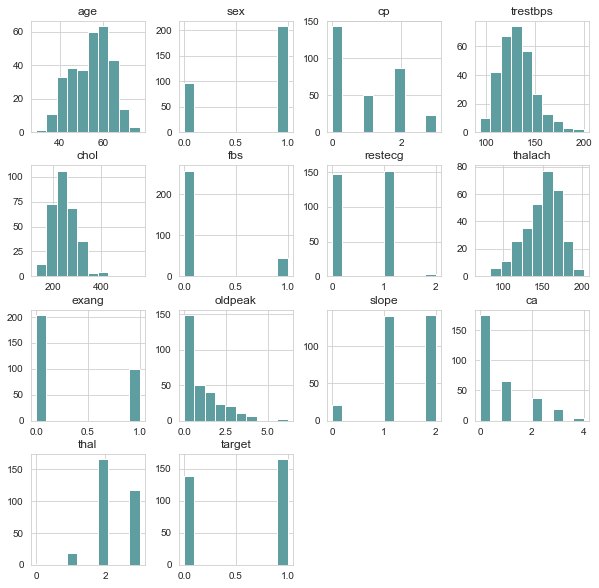

In [10]:
df.hist(figsize = (10,10), color = "#5F9EA0")
plt.show()


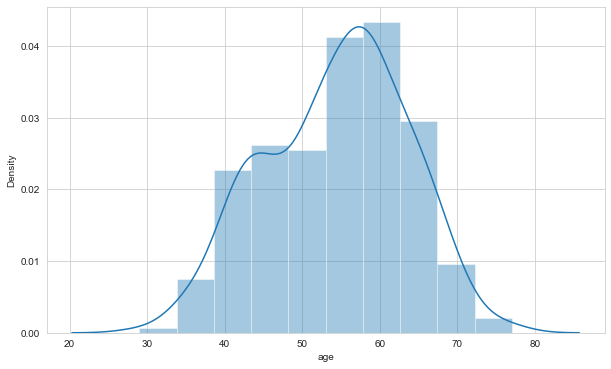

In [11]:
#visualizing the age column

f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

In [12]:
# scaling the different values in same range

from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
#splitting the variables as independent and dependent
cols=['sex', 'chol', 'fbs', 'restecg', 'target']

X = df.drop(cols, axis = 1)
#X = df.drop(['target'], axis = 1)
y = df['target']

In [15]:
X

,age,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,3,0.763956,0.015443,0,1.087338,0,0,1
1,-1.915313,2,-0.092738,1.633471,0,2.122573,0,0,2
2,-1.474158,1,-0.092738,0.977514,0,0.310912,2,0,2
3,0.180175,1,-0.663867,1.239897,0,-0.206705,2,0,2
4,0.290464,0,-0.663867,0.583939,1,-0.379244,2,0,2
...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0.478391,-1.165281,1,-0.724323,1,0,3
299,-1.033002,3,-1.234996,-0.771706,0,0.138373,1,0,3
300,1.503641,0,0.706843,-0.378132,0,2.036303,1,2,3
301,0.290464,0,-0.092738,-1.515125,1,0.138373,1,1,3


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [17]:
from sklearn.ensemble import RandomForestClassifier

heart_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
heart_model.fit(X_train, y_train)
heart_model.score(X_train, y_train)

0.9905660377358491

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = heart_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74        50
           1       0.68      0.78      0.73        41

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

0.7362637362637363


In [20]:
import pickle
# open a file, where you ant to store the data
file = open('heart_model.pkl', 'wb')

# dump information to that file
pickle.dump(heart_model, file)

In [21]:
loaded_model = joblib.load('heart_model.pkl')
result = loaded_model.score(X_test, y_test )
print(result)

0.7362637362637363
